# **Upload Libraries & CSV File**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# file=files.upload()

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

# **Explore the Data**

In [ ]:
# Display the first few rows of the training dataset
print(train_df.head())

# Display basic information about the training dataset
print(train_df.info())

# Display basic statistical details of the numerical columns
print(train_df.describe())

   Id          Actor1        Actor2            Actor3        Director  \
0   1      Aamir Khan  Akshay Kumar      Katrina Kaif  Anurag Kashyap   
1   2      Aamir Khan    Ajay Devgn      Katrina Kaif  Anurag Kashyap   
2   3     Salman Khan  Akshay Kumar      Katrina Kaif  Anurag Kashyap   
3   4      Aamir Khan    Ajay Devgn  Deepika Padukone  Anurag Kashyap   
4   5  Shah Rukh Khan    Sunny Deol      Katrina Kaif  Anurag Kashyap   

             Genre  Budget  Runtime Language  LanguagesDubbedCount  \
0           Comedy     214      128    Hindi                     7   
1            Drama      66      103    Hindi                     1   
2  Science Fiction     138      109    Hindi                     9   
3           Horror      58      139    Hindi                     7   
4            Drama      72      187    Hindi                     6   

   TrailerViewCount  HitOrFlop  
0                 9          0  
1                 6          1  
2                 5          0  
3       

# **Data Preprocessing**

In [ ]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())

Id                      0
Actor1                  0
Actor2                  0
Actor3                  0
Director                0
Genre                   0
Budget                  0
Runtime                 0
Language                0
LanguagesDubbedCount    0
TrailerViewCount        0
HitOrFlop               0
dtype: int64


In [ ]:
# Check for missing values in the testing dataset
print(test_df.isnull().sum())

Id                      0
Actor1                  0
Actor2                  0
Actor3                  0
Director                0
Genre                   0
Budget                  0
Runtime                 0
Language                0
LanguagesDubbedCount    0
TrailerViewCount        0
dtype: int64


In [ ]:
# check for duplicated values in the training dataset
print(train_df.duplicated().sum())

0


In [ ]:
# check for duplicated values in the testing dataset
print(test_df.duplicated().sum())

0


In [ ]:
# Drop the 'Id' column permanently from both DataFrames
train_df.drop(columns=['Id','Language'], axis=1, inplace=True)
test_df.drop(columns=['Id','Language'], axis=1, inplace=True)

# Verify that the 'Id' column has been removed
print(train_df.head())
print(test_df.head())

           Actor1        Actor2            Actor3        Director  \
0      Aamir Khan  Akshay Kumar      Katrina Kaif  Anurag Kashyap   
1      Aamir Khan    Ajay Devgn      Katrina Kaif  Anurag Kashyap   
2     Salman Khan  Akshay Kumar      Katrina Kaif  Anurag Kashyap   
3      Aamir Khan    Ajay Devgn  Deepika Padukone  Anurag Kashyap   
4  Shah Rukh Khan    Sunny Deol      Katrina Kaif  Anurag Kashyap   

             Genre  Budget  Runtime  LanguagesDubbedCount  TrailerViewCount  \
0           Comedy     214      128                     7                 9   
1            Drama      66      103                     1                 6   
2  Science Fiction     138      109                     9                 5   
3           Horror      58      139                     7                 2   
4            Drama      72      187                     6                 5   

   HitOrFlop  
0          0  
1          1  
2          0  
3          1  
4          1  
           Actor1   

# **Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the label encoders for each categorical feature
label_encoders = {}
categorical_features = ['Actor1', 'Actor2', 'Actor3', 'Director', 'Genre']

# Apply label encoding to each categorical feature
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Display the first few rows of the processed training dataset
print(train_df.head())


   Actor1  Actor2  Actor3  Director  Genre  Budget  Runtime  \
0       0       1       1         0      1     214      128   
1       0       0       1         0      2      66      103   
2       1       1       1         0      5     138      109   
3       0       0       0         0      3      58      139   
4       2       2       1         0      2      72      187   

   LanguagesDubbedCount  TrailerViewCount  HitOrFlop  
0                     7                 9          0  
1                     1                 6          1  
2                     9                 5          0  
3                     7                 2          1  
4                     6                 5          1  


# **Scaling Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to be scaled
numerical_features = ['Budget', 'Runtime', 'LanguagesDubbedCount', 'TrailerViewCount']

# Apply standard scaling to numerical features
scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Display the first few rows of the scaled training dataset
print(train_df.head())

   Actor1  Actor2  Actor3  Director  Genre    Budget   Runtime  \
0       0       1       1         0      1  1.139024 -0.704482   
1       0       0       1         0      2 -1.377942 -1.552555   
2       1       1       1         0      5 -0.153472 -1.349018   
3       0       0       0         0      3 -1.513994 -0.331330   
4       2       2       1         0      2 -1.275903  1.296970   

   LanguagesDubbedCount  TrailerViewCount  HitOrFlop  
0              0.539226          1.509575          0  
1             -1.530929          0.196357          1  
2              1.229278         -0.241382          0  
3              0.539226         -1.554599          1  
4              0.194200         -0.241382          1  


# **Exploratory Data Analysis (EDA)**

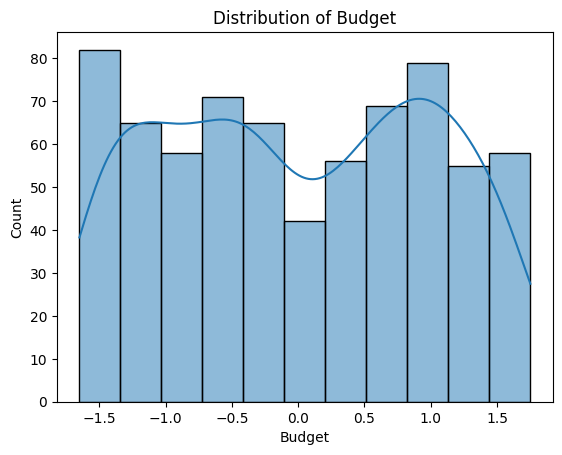

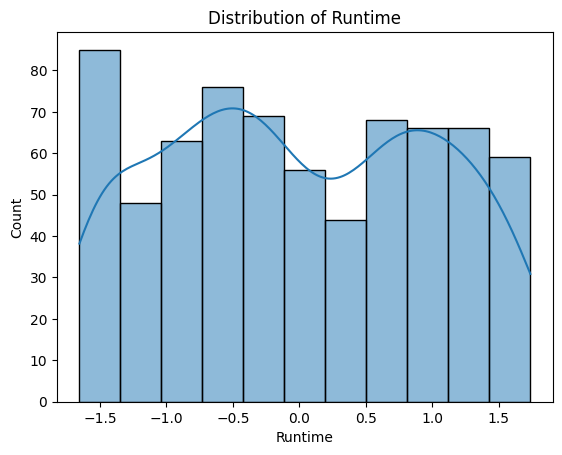

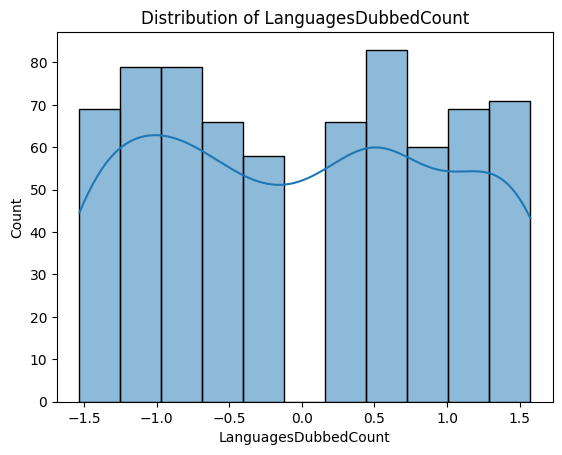

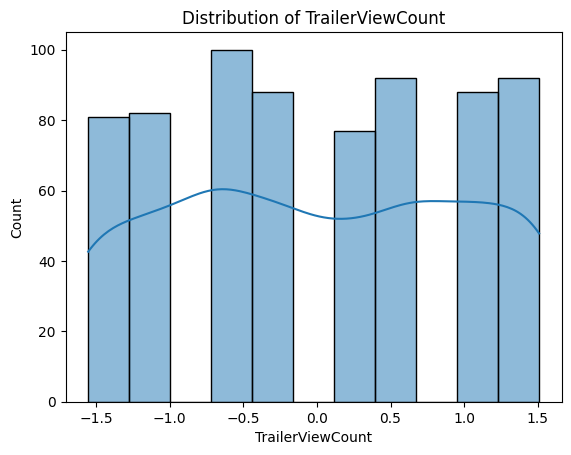

In [ ]:
# Plot histograms for numerical features
for feature in numerical_features:
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

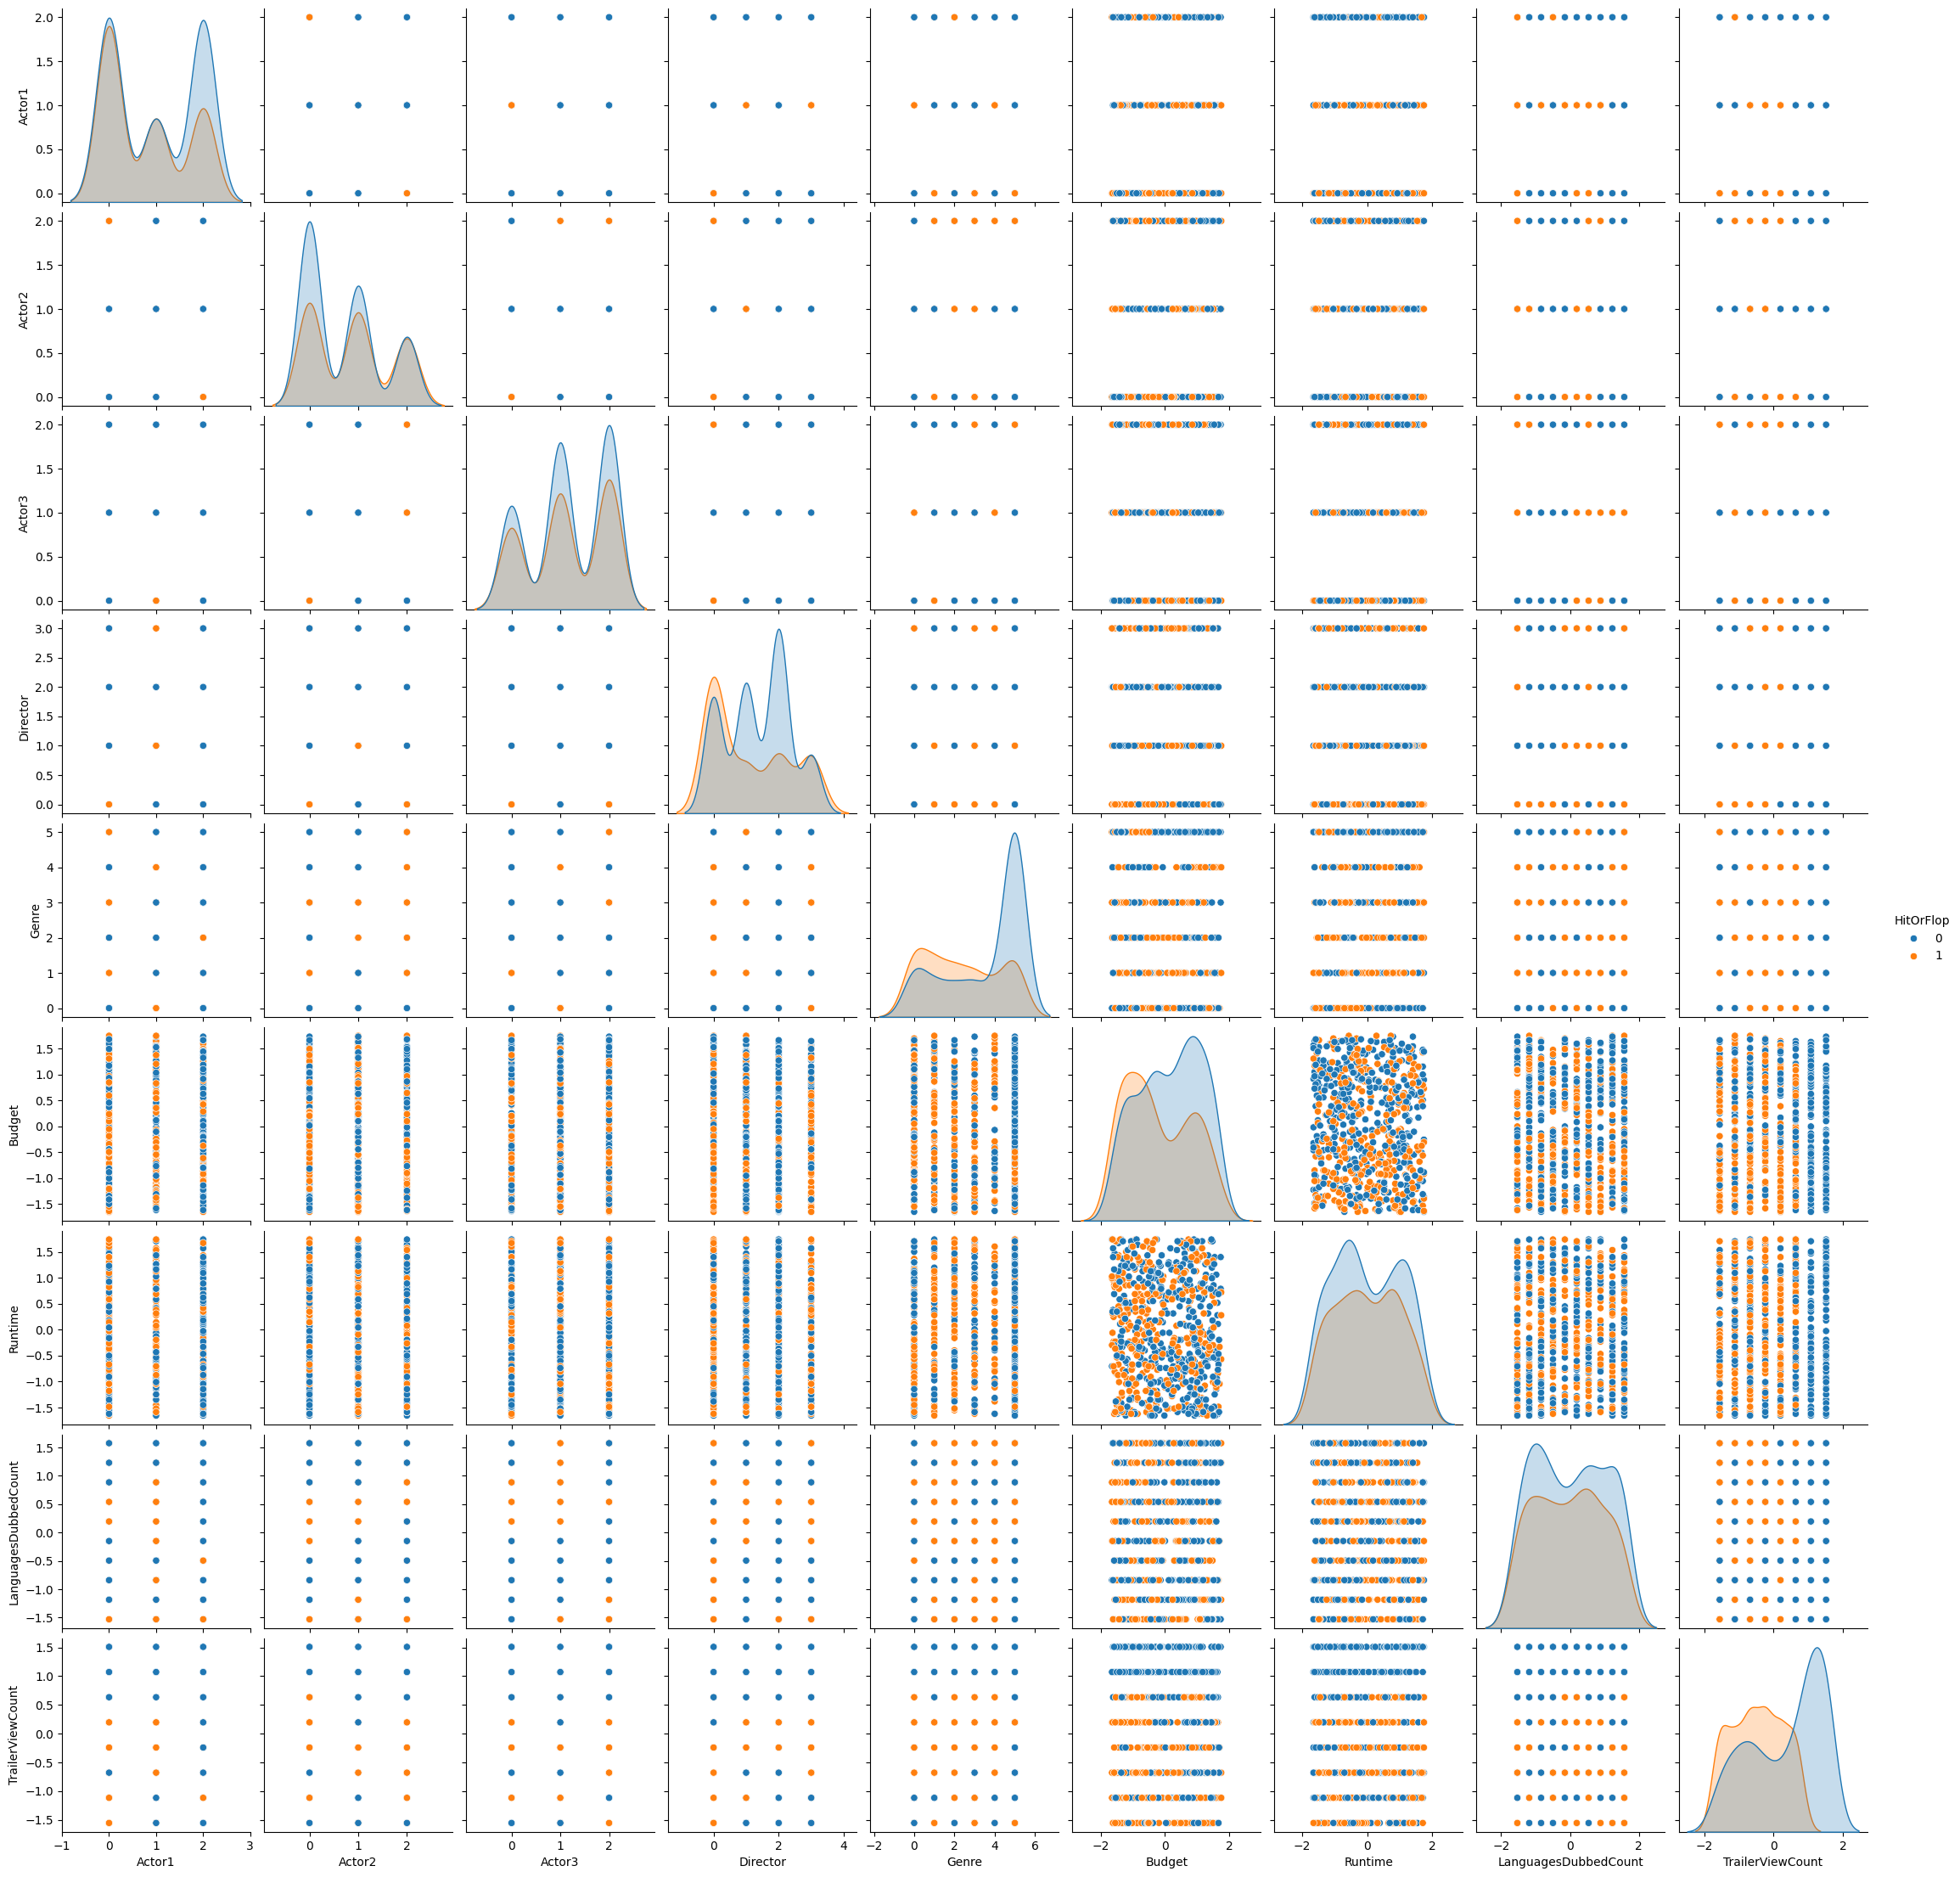

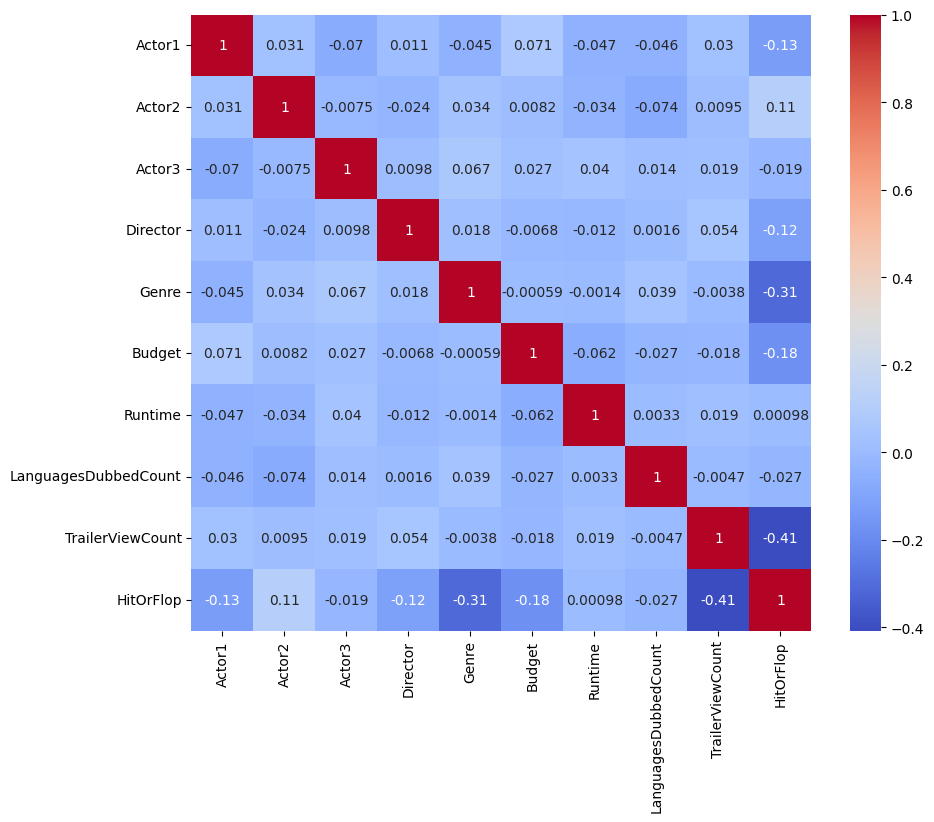

In [ ]:
# Analyzing Relationships Between Features and the Target Variable
# Use pair plots and correlation heatmaps to explore relationships.

# Pair plot to visualize relationships between numerical features and the target variable
sns.pairplot(train_df, hue='HitOrFlop')
plt.show()

print()

# Correlation heatmap to identify correlations between features
plt.figure(figsize=(10,8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Model Selection**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X = train_df.drop('HitOrFlop', axis=1)
y = train_df['HitOrFlop']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_val)
print("Logistic Regression - Accuracy:", accuracy_score(y_val, y_pred))
print("Logistic Regression - Classification Report:\n", classification_report(y_val, y_pred))


Logistic Regression - Accuracy: 0.7428571428571429
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        70
           1       0.81      0.63      0.71        70

    accuracy                           0.74       140
   macro avg       0.76      0.74      0.74       140
weighted avg       0.76      0.74      0.74       140



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and validation sets
X = train_df.drop('HitOrFlop', axis=1)
y = train_df['HitOrFlop']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model
y_pred = dt.predict(X_val)
print("Decision Tree - Accuracy:", accuracy_score(y_val, y_pred))
print("Decision Tree - Classification Report:\n", classification_report(y_val, y_pred))


Decision Tree - Accuracy: 0.9785714285714285
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.97      0.99      0.98        70

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and validation sets
X = train_df.drop('HitOrFlop', axis=1)
y = train_df['HitOrFlop']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


0.9928571428571429
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.99      1.00      0.99        70

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



# **Model Training and Evaluation**

In [ ]:
#Train multiple models and evaluate their performance using appropriate metrics.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{model_name} - Accuracy: {accuracy_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))


Logistic Regression - Accuracy: 0.7428571428571429
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        70
           1       0.81      0.63      0.71        70

    accuracy                           0.74       140
   macro avg       0.76      0.74      0.74       140
weighted avg       0.76      0.74      0.74       140

Decision Tree - Accuracy: 0.9785714285714285
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.97      0.99      0.98        70

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

Random Forest - Accuracy: 0.9928571428571429
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.99      1.00      0.99        70

    accuracy                           0.

# **Hyperparameter Tuning**

In [ ]:
# Optimize model hyperparameters using Grid Search or Random Search.

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best estimator
print(grid_search.best_params_)
best_clf = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# **Final Model Selection**

In [ ]:
best_clf.fit(X, y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)

# **Make Predictions**

In [ ]:
# Make predictions on the test set
test_predictions = best_clf.predict(test_df)

# **Prepare Submission**

In [ ]:
# Prepare the submission file
submission = sample_submission.copy()
submission['HitOrFlop'] = test_predictions
submission.to_csv('my_submission.csv', index=False)

# **Provide a Download Link**

In [ ]:
from google.colab import files

# Download the file
files.download('my_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>